In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

Intercalibrazione

In [18]:
import pandas as pd
data=pd.read_excel("InterCalibrazione-2.xlsx", sheet_name='batch' )
display(data)

channels = [0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 14, 15]
channel_idx = [0, -1, 1, 2, 3, 4, 5, 6, 7, -1, 8, 9, -1, -1, 10, 11]

ch=np.zeros((12,5))
ch_err=np.zeros((12,5))

for j in channels:
    for i in range(0,5):
        
        ch[channel_idx[j]][i] = data["val_"+str(i+1)][j]
        ch_err[channel_idx[j]][i] = np.sqrt(data["err_stat_"+str(i+1)][j]**2 + data["err_sist_"+str(i+1)][j]**2)


,ch,val_1,err_stat_1,err_sist_1,val_2,err_stat_2,err_sist_2,val_3,err_stat_3,err_sist_3,...,err_stat_4,err_sist_4,media,std,drift relativo,Drift relativo [%],Range,val_5,err_stat_5,err_sist_5
0,0,-312.74,0.22,2.3,-312.4,0.3,3.5,-312.90,0.30,2.0,...,0.22,1.10,-311.7725,1.826935,0.005860,0.585983,L,-310.17,0.22,1.64
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,-335.93,0.25,1.5,-336.6,2.0,1.4,-336.60,0.60,1.4,...,0.53,2.60,-337.2250,1.725814,0.005118,0.511769,L,-339.30,0.31,1.70
3,3,-957.88,0.94,6.2,-955.0,1.0,2.9,-958.27,0.86,8.0,...,1.10,1.20,-957.3625,1.586577,0.001657,0.165724,H,-959.35,0.96,5.20
4,4,-1444.99,0.95,2.2,-1467.5,0.8,3.1,-1474.96,0.73,4.0,...,1.20,4.80,-1467.7125,16.482122,0.011230,1.122980,H,-1487.60,0.96,2.50
5,5,-1529.10,1.30,5.3,-1530.0,1.0,8.0,-1536.94,0.92,7.0,...,1.10,6.90,-1533.2850,4.328922,0.002823,0.282330,H,-1541.58,1.28,5.08
6,6,-272.68,0.63,4.2,-281.8,0.7,3.6,-280.22,0.54,6.0,...,1.50,4.50,-279.7500,5.003692,0.017886,1.788630,L,-280.96,0.67,2.93
7,7,-1671.30,1.20,1.0,-1695.0,1.0,0.5,-1697.00,1.00,2.0,...,1.20,5.30,-1695.8750,19.980553,0.011782,1.178185,H,-1730.70,1.20,6.60
8,8,-1119.82,0.71,1.5,-1140.9,0.7,3.5,-1155.02,0.66,2.0,...,0.73,2.40,-1143.8150,17.855497,0.015610,1.561048,H,-1161.20,0.75,0.81
9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
peak_centers=np.array(data["media"])     #posizioni dei picchi
peak_err_stat=np.array(data["std"])      #errori stocastici sulla posizione dei picchi
#peak_err_sist=np.array(data["err_sist [pC]"])
#peak_err=np.sqrt(peak_err_stat**2 + (0.34*peak_err_sist)**2)
peak_err=peak_err_stat
print(peak_centers)

[ -311.7725        nan  -337.225   -957.3625 -1467.7125 -1533.285
  -279.75   -1695.875  -1143.815         nan  -386.05    -551.26
        nan        nan  -530.0575  -801.41  ]


In [6]:
channel_ref=3
ref=peak_centers[channel_ref]

In [7]:
coeff_cal=peak_centers/peak_centers[channel_ref]
coeff_err=peak_err/peak_centers[channel_ref]*(-1)
coeff_err[channel_ref]=0
print("coefficienti di intercalibrazione\n", coeff_cal)
print("errori\n", coeff_err)

coefficienti di intercalibrazione
 [0.32565773        nan 0.35224379 1.         1.53307916 1.60157203
 0.29220906 1.7714032  1.19475643        nan 0.40324329 0.57581115
        nan        nan 0.55366436 0.83710193]
errori
 [0.0019083         nan 0.00180268 0.         0.01721618 0.00452172
 0.00522654 0.02087042 0.01865072        nan 0.00156729 0.00435407
        nan        nan 0.00301281 0.00307152]


In [8]:
list=[0,2,3,4,5,6,7,8,10,11,14,15]
#list=[0, 3, 5, 6, 7, 10, 15] #commentare per vedere tutto, scommentare per vedere quelli belli
train_peak_centers=np.array([peak_centers[i]/coeff_cal[i] for i in list])

train_peak_errors=np.array([np.sqrt((peak_err[i]/coeff_cal[i])**2 + (coeff_err[i]*peak_centers[i]/coeff_cal[i]**2)**2) for i in list])

print(train_peak_centers)
print(train_peak_errors)


[-957.3625 -957.3625 -957.3625 -957.3625 -957.3625 -957.3625 -957.3625
 -957.3625 -957.3625 -957.3625 -957.3625 -957.3625]
[ 7.93371712  6.92892066  1.5865765  15.20419923  3.82250705 24.21652823
 15.95163035 21.13525836  5.2622828  10.23779669  7.36744363  4.96782208]


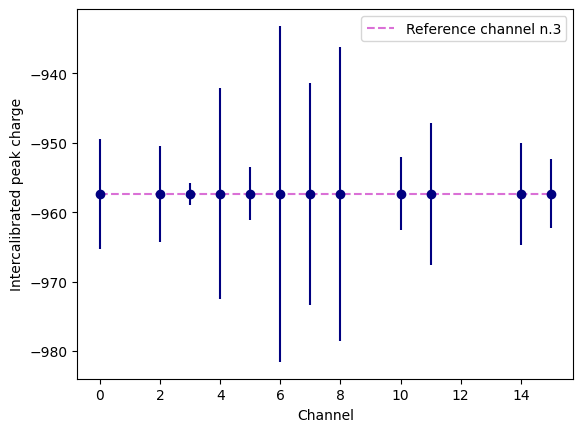

In [9]:
#plot
plt.errorbar(list, train_peak_centers, yerr=train_peak_errors, ls='', marker='o', color='navy')
plt.plot(list, 0*np.array(list) + peak_centers[channel_ref], color='orchid', ls='--', label='Reference channel n.{}'.format(channel_ref))
plt.xlabel('Channel')
plt.ylabel('Intercalibrated peak charge')
plt.legend()

##  Test

In [14]:

peak_centers=np.array(data["val_5"])     #posizioni dei picchi dei dati di test

peak_err_stat=np.array(data["err_stat_5"])      #errori stocastici sulla posizione dei picchi

peak_err_sist=np.array(data["err_sist_5"])  #errori sistematici

peak_err_drift=np.array(data["std"])  #errori di drift

peak_err=np.sqrt(peak_err_stat**2 + (peak_err_sist)**2 + (peak_err_drift)**2)

print("dati di test\n", peak_centers)

###########################################################################
test_peak_centers=np.array([peak_centers[i]/coeff_cal[i] for i in list])
print(test_peak_centers)
#test_peak_errors=np.array([np.sqrt((peak_err[i]/coeff_cal[i])**2 + (coeff_err[i]*peak_centers[i]/coeff_cal[i]**2)**2) for i in list])
test_peak_errors=np.array([peak_err[i]/coeff_cal[i] for i in list])

print(test_peak_errors)

print( (test_peak_centers-ref)/test_peak_errors  )


dati di test
 [ -310.17      nan  -339.3   -959.35 -1487.6  -1541.58  -280.96 -1730.7
 -1161.2       nan  -387.1   -545.71      nan      nan  -528.71  -796.46]
[-952.44168945 -963.2533064  -959.35       -970.33475902 -962.54178626
 -961.50337087 -977.02205572 -971.91358305 -959.96638713 -947.72392315
 -954.92871505 -951.44924165]
[ 7.56896452  6.93337809  5.52076308 10.89197645  4.24327346 19.97547235
 11.89824343 14.97341869  5.41900489  7.88074797  6.56998528  5.88627207]
[ 0.65012995 -0.84963005 -0.36000458 -1.1909922  -1.22058743 -0.20729777
 -1.6523074  -0.97179431 -0.4805102   1.22305356  0.37043994  1.00458461]


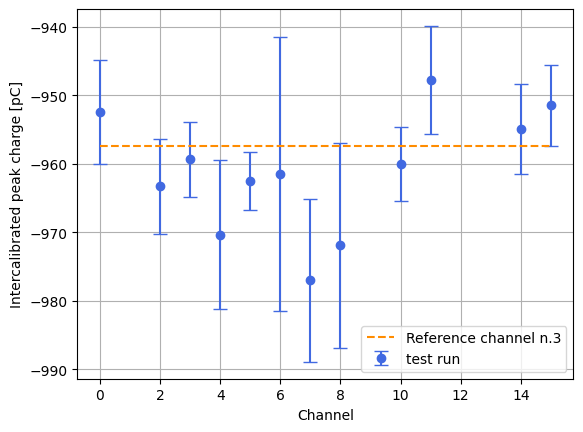

In [16]:
#plot
#plt.errorbar(list, train_peak_centers, yerr=train_peak_errors, ls='', capsize=5,  marker='o', color='darkorange', label= 'calibration run')
plt.errorbar(list, test_peak_centers, yerr=test_peak_errors, ls='', capsize=5, marker='o', color='royalblue', label='test run')
plt.plot(list, 0*np.array(list) + ref, color='darkorange', ls='--', label='Reference channel n.{}'.format(channel_ref))
#plt.plot(list, (test_peak_centers-ref)/test_peak_errors, ls='', marker='o', color='red')
#plt.ylim(peak_centers[channel_ref]-50, peak_centers[channel_ref]+50)
#plt.ylim(-990, -930)
plt.grid()
plt.xlabel('Channel')
plt.ylabel('Intercalibrated peak charge [pC]')
plt.legend(loc= 'lower right')


#plot in kev
    

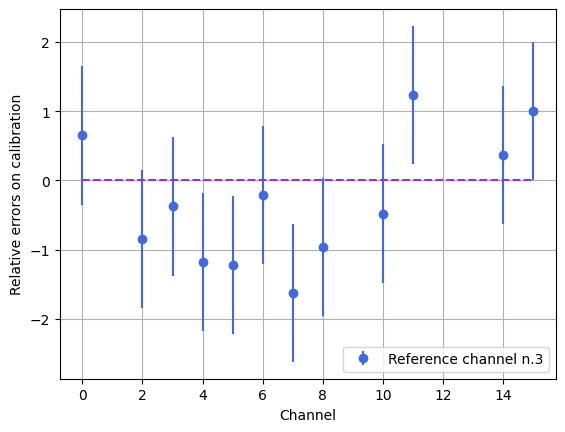

In [174]:
plt.errorbar(list, (test_peak_centers-ref)/test_peak_errors, yerr=1, ls='', marker='o', color='royalblue', label='Reference channel n.{}'.format(channel_ref))
plt.plot(list, 0*np.array(list), color='darkorchid', ls='--')
plt.grid()
plt.xlabel('Channel')
plt.ylabel('Relative errors on calibration')
plt.legend(loc= 'lower right')



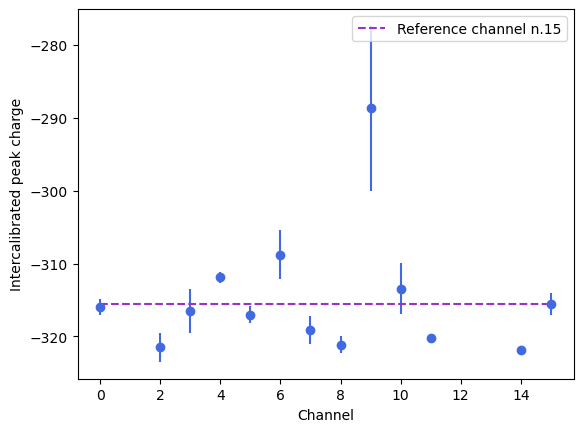

In [1517]:
#plot con train e test insieme
#plot
plt.errorbar(list, test_peak_centers, yerr=test_peak_errors, ls='', marker='o', color='royalblue')
plt.plot(list, 0*np.array(list) + peak_centers[channel_ref], color='darkorchid', ls='--', label='Reference channel n.{}'.format(channel_ref))
plt.xlabel('Channel')
plt.ylabel('Intercalibrated peak charge')
plt.legend()
    

In [1518]:
#0, 3, 5, 7, 10, 15
nice_channels=[0, 3, 5, 7, 10, 15]

# Picchi all together train

In [1519]:
def load_histo(dat_PATH):
    data = np.loadtxt(dat_PATH, skiprows=0, comments='==')
    noises_edges = np.zeros((int(data.shape[0]/2), data.shape[1]))       #np.array([[]] * int(data.shape[0]/2))
    noises_values = np.zeros((int(data.shape[0]/2), data.shape[1]))       #np.array([[]] * int(data.shape[0]/2))

    for i in range(int(data.shape[0]/2)):
        noises_edges[i] = (data[2 * i])
        noises_values[i] = (data[2 * i + 1])

    return noises_edges, noises_values


def rebin(data, factor):
    if len(data) % factor != 0:
        raise ValueError("Length of data must be divisible by factor.")
    rebinned_data = np.sum(data.reshape(-1, factor), axis=1)
    return rebinned_data

In [1520]:
PATH_MARTI="../Dati/Run_chall_ChargeHistos_4_12_2024_10M.dat"
#PATH_SAM="../Dati/12_APR/Run_chall_ChargeHistos_4_12_2024_10M.dat"
edge_N_all, bin_N_all = load_histo(PATH_MARTI)

channel = 0

if(channel == 12 or channel == 13 or channel == 1):
    exit()

channel_idx = [0, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1, -1, 11, 12]

    
edge_N = edge_N_all[channel_idx[channel]]
bin_N = bin_N_all[channel_idx[channel]]

rebin_fact = 1
bin_N = rebin(bin_N, rebin_fact)
tmp = []
for i in range(len(edge_N)):
    if(i % rebin_fact == 0):
        tmp.append(edge_N[i])

tmp.append(edge_N[-1])
edge_N = np.array(tmp)

centers_N = np.convolve(edge_N, [0.5, 0.5], "valid")
err_N = np.sqrt(bin_N)


Text(0, 0.5, 'counts')

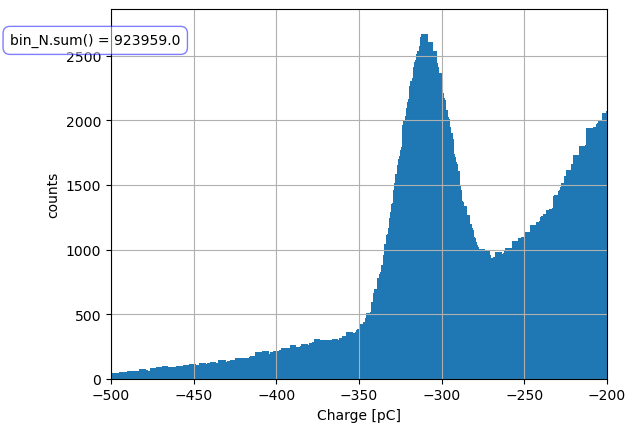

In [1521]:
lim_list = [[-500, -200],  #ch0
                [-1, -1],  #ch1
                [-360, -300],  #ch2
                [-350, -280],  #ch3
                [-320, -263],  #ch4
                [-320, -270],  #ch5
                [-310, -250],  #ch6
                [-365, -310],  #ch7
                [-335, -280],  #ch8
                [340, 470],  #ch9
                [-409, -340],  #ch10
                [-318, -255],  #ch11
                [-1, -1],  #ch12
                [-1, -1],  #ch13
                [-350, -280],  #ch14
                [-340, -290]   #ch15
                ]

lim_N = lim_list[channel]
plt.text(centers_N.min() * 0.85, bin_N.max() * 95 / 100, f'{bin_N.sum() = }', fontsize=10, color='black', ha='center',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='blue', boxstyle='round,pad=0.5'))
plt.bar(centers_N, bin_N, width = 4)
plt.xlim(lim_N)
plt.grid()
plt.xlabel("Charge [pC]")
plt.ylabel("counts")

2898.0


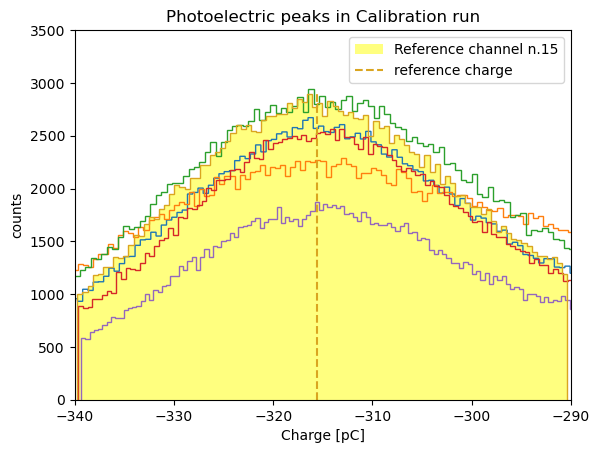

In [1522]:
for ch in nice_channels:

    lim_N=lim_list[ch]
    edge_N = edge_N_all[channel_idx[ch]]
    bin_N = bin_N_all[channel_idx[ch]]
    centers_N = np.convolve(edge_N, [0.5, 0.5], "valid")
    edge_N=edge_N[np.where((centers_N > lim_N[0]) & (centers_N < lim_N[1]))]
    bin_N = bin_N[np.where((centers_N > lim_N[0]) & (centers_N < lim_N[1]))]
    centers_N = centers_N[np.where((centers_N > lim_N[0]) & (centers_N < lim_N[1]))]

    #sfrutto la ricalibrazione per spostare i picchi

    if(ch!=channel_ref):
        #plt.bar(centers_N/coeff_c
        plt.hist(edge_N/coeff_cal[ch], bins=len(bin_N), weights=bin_N, linewidth=1, histtype='step',fill=False)
    else:
        plt.hist(edge_N/coeff_cal[ch], bins=len(bin_N), weights=bin_N, linewidth=1, color='yellow', alpha=0.5, label ='Reference channel n.{}'.format(channel_ref))
        counts,b,p=plt.hist(edge_N/coeff_cal[ch], bins=len(bin_N), weights=bin_N, linewidth=1, histtype='step',fill=False, edgecolor='goldenrod')
        plt.vlines(x=peak_centers[channel_ref], ymin=0, ymax=np.max(counts), linestyle='--', linewidth=1.5, color='goldenrod', label='reference charge')
        print(np.max(counts))

plt.xlim(-340, -290)
plt.ylim(0, 3500)
plt.xlabel("Charge [pC]")
plt.ylabel("counts")
plt.title('Photoelectric peaks in Calibration run')
plt.legend()





   

# Picchi all together test

In [1523]:
PATH_MARTI="../Dati/Run_allch_TEST_7M_4_12_2024.dat"
#PATH_SAM="../Dati/12_APR/Run_chall_ChargeHistos_4_12_2024_10M.dat"
edge_N_all, bin_N_all = load_histo(PATH_MARTI)

channel = 15

if(channel == 12 or channel == 13 or channel == 1):
    exit()

channel_idx = [0, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1, -1, 11, 12]

    
edge_N = edge_N_all[channel_idx[channel]]
bin_N = bin_N_all[channel_idx[channel]]

rebin_fact = 1
bin_N = rebin(bin_N, rebin_fact)
tmp = []
for i in range(len(edge_N)):
    if(i % rebin_fact == 0):
        tmp.append(edge_N[i])

tmp.append(edge_N[-1])
edge_N = np.array(tmp)

centers_N = np.convolve(edge_N, [0.5, 0.5], "valid")
err_N = np.sqrt(bin_N)


Text(0, 0.5, 'counts')

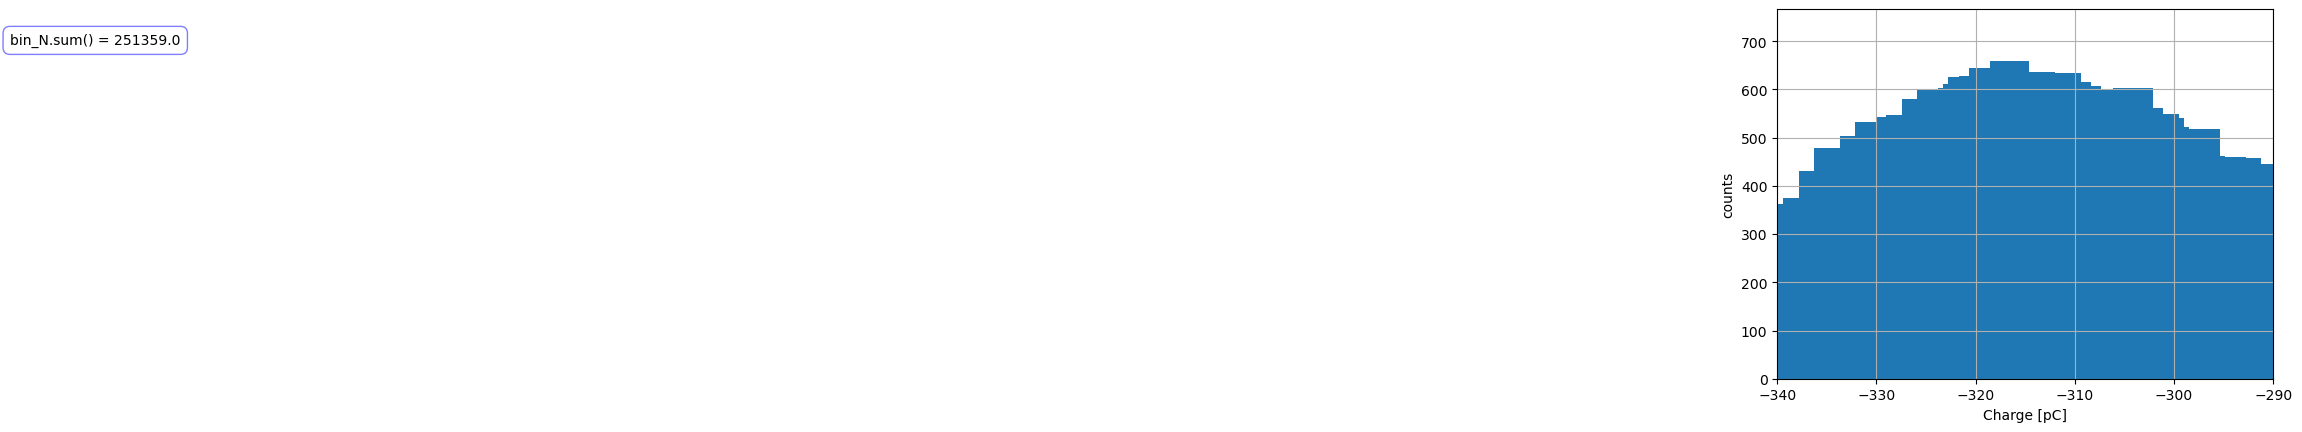

In [1524]:
lim_list = [[-335, -285],  #ch0
                [-1, -1],  #ch1
                [-360, -300],  #ch2
                [-355, -285],  #ch3
                [-320, -263],  #ch4
                [-320, -270],  #ch5
                [-310, -250],  #ch6
                [-365, -315],  #ch7
                [-335, -280],  #ch8
                [340, 470],  #ch9
                [-410, -350],  #ch10
                [-318, -255],  #ch11
                [-1, -1],  #ch12
                [-1, -1],  #ch13
                [-350, -280],  #ch14
                [-340, -290]   #ch15
                ]

lim_N = lim_list[channel]
plt.text(centers_N.min() * 0.85, bin_N.max() * 95 / 100, f'{bin_N.sum() = }', fontsize=10, color='black', ha='center',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='blue', boxstyle='round,pad=0.5'))
plt.bar(centers_N, bin_N, width = 4)
plt.xlim(lim_N)
plt.grid()
plt.xlabel("Charge [pC]")
plt.ylabel("counts")

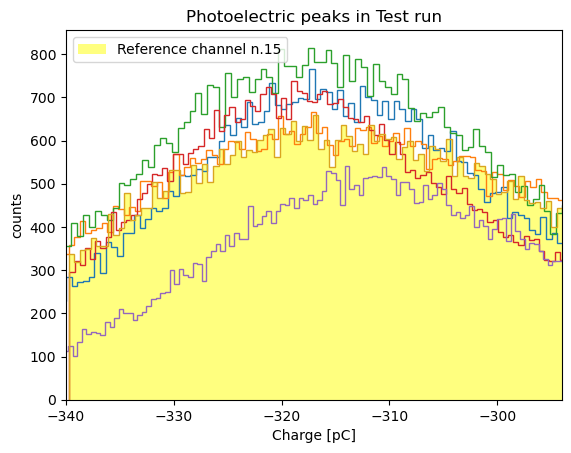

In [1525]:
for ch in nice_channels:

    lim_N=lim_list[ch]
    edge_N = edge_N_all[channel_idx[ch]]
    bin_N = bin_N_all[channel_idx[ch]]
    centers_N = np.convolve(edge_N, [0.5, 0.5], "valid")
    edge_N=edge_N[np.where((centers_N > lim_N[0]) & (centers_N < lim_N[1]))]
    bin_N = bin_N[np.where((centers_N > lim_N[0]) & (centers_N < lim_N[1]))]
    centers_N = centers_N[np.where((centers_N > lim_N[0]) & (centers_N < lim_N[1]))]

    #sfrutto la ricalibrazione per spostare i picchi

    if(ch!=channel_ref):
        #plt.bar(centers_N/coeff_c
        plt.hist(edge_N/coeff_cal[ch], bins=len(bin_N), weights=bin_N, linewidth=1, histtype='step',fill=False)
    else:
        plt.hist(edge_N/coeff_cal[ch], bins=len(bin_N), weights=bin_N, linewidth=1, color='yellow', alpha=0.5, label ='Reference channel n.{}'.format(channel_ref))
        plt.hist(edge_N/coeff_cal[ch], bins=len(bin_N), weights=bin_N, linewidth=1, histtype='step',fill=False, edgecolor='goldenrod')

plt.xlim(-340, -294)
plt.xlabel("Charge [pC]")
plt.ylabel("counts")
plt.title('Photoelectric peaks in Test run')
plt.legend()





   